In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving eye_dataset.zip to eye_dataset.zip


In [ ]:
!unzip eye_dataset.zip -d /content/eye_dataset


Archive:  eye_dataset.zip
replace /content/eye_dataset/eye_dataset/down/left_1764002872060.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/eye_dataset/eye_dataset/down/left_1764002872060.jpg  
  inflating: /content/eye_dataset/eye_dataset/down/left_1764002872219.jpg  
  inflating: /content/eye_dataset/eye_dataset/down/left_1764002872377.jpg  
  inflating: /content/eye_dataset/eye_dataset/down/left_1764002872538.jpg  
  inflating: /content/eye_dataset/eye_dataset/down/left_1764002872726.jpg  
  inflating: /content/eye_dataset/eye_dataset/down/left_1764002872874.jpg  
  inflating: /content/eye_dataset/eye_dataset/down/left_1764002873067.jpg  
  inflating: /content/eye_dataset/eye_dataset/down/left_1764002873226.jpg  
  inflating: /content/eye_dataset/eye_dataset/down/left_1764002873371.jpg  
  inflating: /content/eye_dataset/eye_dataset/down/left_1764002873563.jpg  
  inflating: /content/eye_dataset/eye_dataset/down/left_1764002873721.jpg  
  inflating: /content/eye_da

rm: cannot remove 'rf': No such file or directory
rm: cannot remove '/eye_dataset': No such file or directory


In [ ]:
#dont run the above run this to copy dataset to local
import shutil, os

drive_dataset_path = '/content/drive/MyDrive/eye_dataset'
local_dataset_path = '/content/gaze_data'

# If you’ve run before, remove the old local copy to avoid duplicates
if os.path.exists(local_dataset_path):
    shutil.rmtree(local_dataset_path)

# Copy the dataset from Drive to Colab local
shutil.copytree(drive_dataset_path, local_dataset_path)

print("✅ Copied dataset to:", local_dataset_path)


KeyboardInterrupt: 

In [ ]:
!rm -rf /content/gaze_data


In [ ]:
#sanity check to see if all the files are copied or not
import os

root = '/content/eye_dataset/eye_dataset'  # inner folder that holds classes

for cls in os.listdir(root):
    class_path = os.path.join(root, cls)
    print(cls, len(os.listdir(class_path)))




up 484
forward 662
left 530
down 550
right 572


In [ ]:
import os, random, shutil

folder = "/content/gaze_data/down"
keep = 300

files = os.listdir(folder)
random.shuffle(files)

for f in files[keep:]:
    os.remove(os.path.join(folder, f))

print("Trimmed down folder to", keep)


Trimmed down folder to 300


Loading dataset...
Found 2798 files belonging to 5 classes.
Using 2239 files for training.
Found 2798 files belonging to 5 classes.
Using 559 files for validation.

Classes: ['down', 'forward', 'left', 'right', 'up']


/tmp/ipython-input-3787773285.py:57: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_32 (InputLayer)     │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_7 (Sequential)       │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_11 (Rescaling)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 2, 2, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_11     │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,597 (9.24 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 23s 248ms/step - accuracy: 0.2506 - loss: 1.9008 - val_accuracy: 0.4508 - val_loss: 1.3764
Epoch 2/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 158ms/step - accuracy: 0.4224 - loss: 1.4799 - val_accuracy: 0.5313 - val_loss: 1.2430
Epoch 3/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 171ms/step - accuracy: 0.4677 - loss: 1.3468 - val_accuracy: 0.5599 - val_loss: 1.1812
Epoch 4/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 171ms/step - accuracy: 0.5322 - loss: 1.2863 - val_accuracy: 0.5939 - val_loss: 1.1324
Epoch 5/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 23s 203ms/step - accuracy: 0.5450 - loss: 1.2074 - val_accuracy: 0.6011 - val_loss: 1.0985
Epoch 6/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 18s 173ms/step - accuracy: 0.5718 - loss: 1.1601 - val_accuracy: 0.6172 - val_loss: 1.0761
Epoch 7/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 20s 173ms/step - accuracy: 0.5700 - loss: 1.1438 - val_accuracy: 0.6297 - val_loss: 1.0533
Epoch 8/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 166ms/step - accuracy: 0.6055 - loss: 1.1144 - val_accu

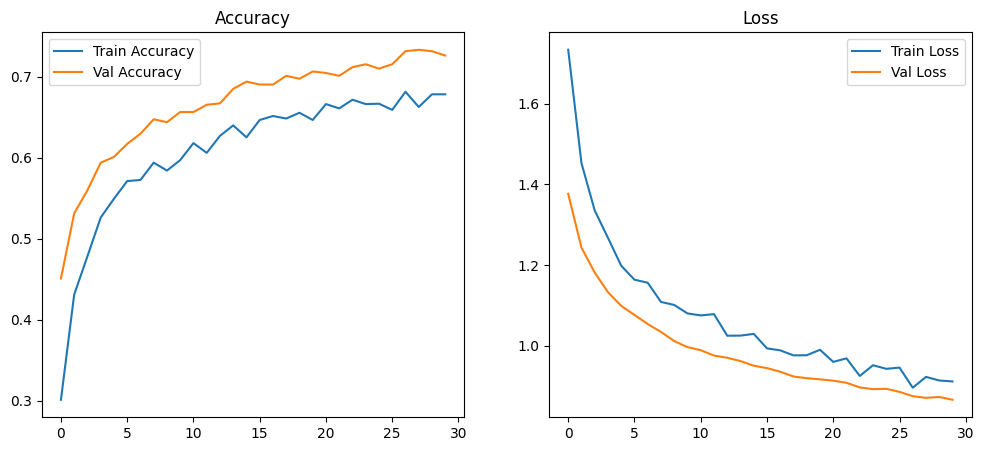

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# ---------------- SETTINGS ---------------- #

DATA_DIR = "/content/eye_dataset/eye_dataset"
IMG_SIZE = (64, 64)
BATCH_SIZE = 32
EPOCHS = 30

# ------------------------------------------- #

print("Loading dataset...")

train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

class_names = train_ds.class_names
print("\nClasses:", class_names)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds   = val_ds.prefetch(AUTOTUNE)

# ---------------- AUGMENTATION ---------------- #

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.10),
    layers.RandomZoom(0.15),
    layers.RandomContrast(0.4),
    layers.RandomBrightness(0.4),
])

# ---------------- MODEL ---------------- #

base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

inputs = tf.keras.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

x = data_augmentation(inputs)
x = layers.Rescaling(1/127.5, offset=-1)(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)

x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(5, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ---------------- TRAIN ---------------- #

checkpoint_path = "/content/drive/MyDrive/gaze_model.keras"

callbacks = [
    EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True),
    ModelCheckpoint(filepath=checkpoint_path, save_best_only=True)
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks
)

print("\nTraining complete!")
print("Saved model to:", checkpoint_path)

# ---------------- PLOTS ---------------- #

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Train Accuracy")
plt.plot(epochs_range, val_acc, label="Val Accuracy")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Train Loss")
plt.plot(epochs_range, val_loss, label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()
